In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
pd.set_option('display.min_rows', 500)
import warnings
warnings.filterwarnings('ignore')

In [4]:
from ensemble_class import Ensemble 

In [26]:
def ensemble(file_list, ensemble_weight, RESULT_PATH='output/'):
    if len(file_list) < 2:
        raise ValueError("Ensemble할 Model을 적어도 2개 이상 입력해 주세요.")
    en = Ensemble(filenames = file_list, filepath = RESULT_PATH)
    strategy_title = 'sw-'+'-'.join(map(str,*ensemble_weight)) #simple weighted
    result = en.simple_weighted(*ensemble_weight)
    en.output_frame['rating'] = result
    output = en.output_frame.copy()
    return output

In [84]:
f_li=['8265','8257','xgbm_sub','tabnet','LSTM','lgcn']
w=[0.25,0.35,0.15,0.1,0.1,0.05]
sum(w)

1.0

<AxesSubplot:ylabel='Density'>

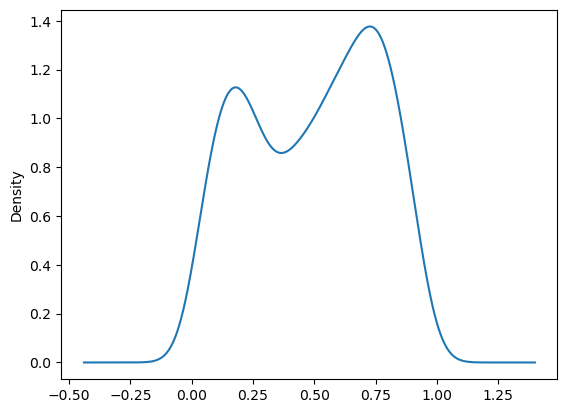

In [85]:
kk = ensemble(f_li,[w])
kk.rename(columns={'rating':'prediction'},inplace=True)
kk.prediction.plot(kind='kde')

In [86]:
kk.to_csv('output/8265_50_LGBM_25_XGBM_10_Tabnet_5_LSTM_5_LGCN_5.csv',index=False)

In [90]:
kk.loc[kk.prediction>0.8,'prediction']=1
kk.loc[kk.prediction<0.2,'prediction']=0

In [92]:
kk.to_csv('output/8265_50_LGBM_25_XGBM_10_Tabnet_5_LSTM_5_LGCN_5_08초과1_02미만0.csv',index=False)